# Pymaceuticals Inc.
---

### Analysis

Hi, Hello. I work at Pymaceuticals, Inc. They specialize in anti-cancer medications, yunno, the cool stuff. I've been called to analyze their screening for potential treatments for squamous cell carcinoma, or SCC. Commonly known as skin cancer.

I've been working here for a long while, I'm not a senior analyst at the company. They gave me their most recent study, with 249 mice that were identified with SCC (skin cancer) tumors, and have received treatment with a range of drug regimens. 45 days after, the tumor development was observed and measures. It's my job to compare the performance of Pyma's drug of interest, Capomulin, vs the other treatment drugs.

## Summary #1
After removing mouse g989 from the data, I had a clean dataframe for my statistics. Our treatment drug of interest, Capomulin, got Second place out of the 10 treatment methods, although it and Ramicane were the two most used treatment drugs in the regiment.

Capomulin did 28% better than the 9 other drugs, and has proved a great treatment option for the mice. The greatest if not for stinky Ramicane. (boo) Sex distribution for the mice is even, 51/49. The quality of our treatment drug and the confidence rates assure treatment between either sex will be effective and secure.

## Summary #2
I noticed not all mice in the data reached 45 days, it breaks my heart to think some of them died days in :( . This means some treatment data was not fully fleshed out, some mice not given the full amount of days to develop. It's minor, though.

Of the ~240 total mice and 10 drugs, I calculated the final tumor volume across four treatment regimens,  ["Capomulin", "Ramicane", "Infubinol", and "Ceftamin"];  The top and bottom two treatment drugs respectively. Averaging the tumor volumes of all mice relating to their drug, Capomulin (38.1) performed slightly worse than Ramicane (37.6) Infubinol and Ceftamin proved nugatory compared to our superior drug.

The box plots I created display the quartiles and medians for the tumor volume observations. Capomulin first quartile was around 48-40, the second quartile 40-38, third quartile 38-33, fourth quartile 33-24.

Although Ramicane had a lower median for their tumor sizes, our Capomulin had fewer mice within the second quartile range, and more mice within the third quartile range. Compared to Ramicane that normally underhit the true median.

## Summary 3
Randomly selecting mouse I509, whom we treated with (my goat) Capomulin, I reviewed his development and saw incredible drops following day 20 and 30. Perhaps the mice were administered the drug on day 0, so after 20 day (four timepoints) there would be drastic drops in tumor volume. Followed by a timepoint of growth, followed by another massive drop. The drug seems to be kicking in every other timepoint, which means the tumor has breathing room to grow.

After creating a scatter plot for Capomulins Tumor volume to mouse weight, I see that there is a linear, natural rise in tumor volume per grams of weight. It seems mice under 18 grams never developed tumors over the size of 40.



In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#school_data_to_load = Path("Resources/schools_complete.csv")
#student_data_to_load = Path("Resources/students_complete.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouseology = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouseology

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
rat_count = mouse_metadata['Mouse ID'].count()
rat_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
ratdup = mouseology.groupby(["Mouse ID", "Timepoint"])
#
ratdup = ratdup["Drug Regimen"].count()
ratdup = pd.DataFrame(ratdup)
ratdup.loc[ratdup["Drug Regimen"]> 1]

Drug Regimen
Mouse ID Timepoint              
g989     0                     2
         5                     2
         10                    2
         15                    2
         20                    2

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseology.loc[mouseology["Mouse ID"]== "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#deletes g989
cleanmouse = mouseology.loc[mouseology["Mouse ID"]!= "g989"]
cleanmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.

rat_count = cleanmouse['Mouse ID'].nunique()
rat_count

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_reg = cleanmouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
mean = drug_reg.mean()
median = drug_reg.median()
variance = drug_reg.var()
deviation = drug_reg.std()
error = drug_reg.sem()

summarytable = pd.DataFrame({
    "Mean Tumor Volume": mean, 
    "Median Tumor Volume":median,
    "Tumor Volume Variance":variance,
    "Tumor Volume Std. Dev.":deviation,
    "Tumor Volume Std. Err.":error
})
summarytable
#ratdup = pd.DataFrame(ratdup)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, NEXT LINE
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
advancedtable = cleanmouse.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
advancedtable

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

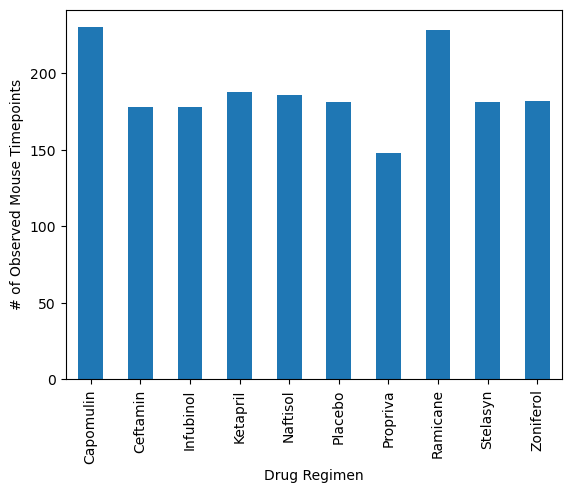

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen 
#using Pandas.
mousetime = cleanmouse.groupby("Drug Regimen")["Mouse ID"].count()
mousetime.plot(kind="bar", ylabel="# of Observed Mouse Timepoints")

###BAR CHART
#dframe.plot.bar(x='Drug Regimen', y='# of Observed Mouse Timepoints')
plt.show

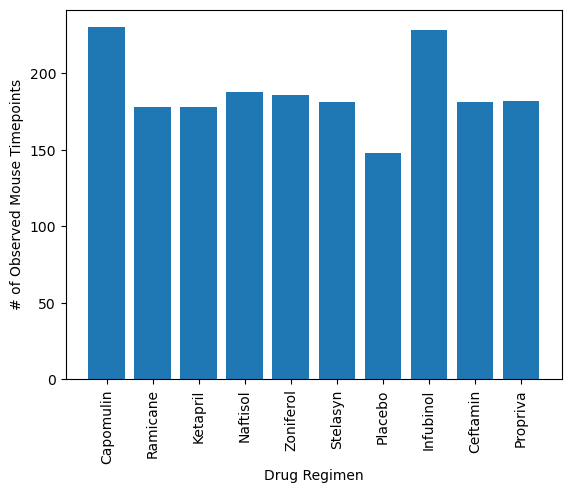

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen 
#using pyplot.
#Titles
#['Mouse ID'].nunique()
mousetime = cleanmouse.groupby("Drug Regimen")["Mouse ID"].count()
#drugs = [cleanmouse[drug_reg]]
drugs = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol',
         'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol',
         'Ceftamin', 'Propriva']

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(drugs,mousetime)
###BAR CHART
plt.xticks(rotation=90)
plt.show()

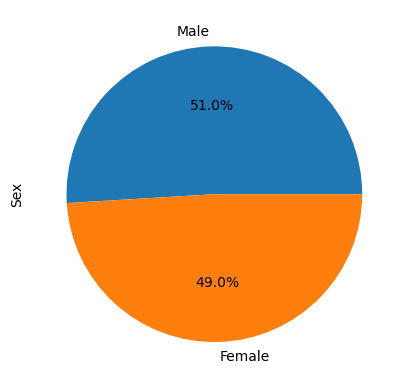

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#uses pandas
male = cleanmouse[cleanmouse['Sex'] == 'male'].count()[0]
female = cleanmouse[cleanmouse['Sex'] == 'Female'].count()[0]

counts = cleanmouse.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
###PIE CHART
plt.show()

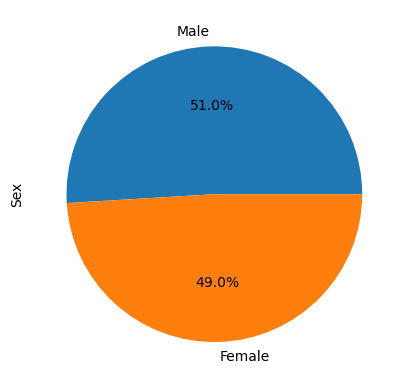

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#uses pyplot matplotlib
genders = ["Male","Female"]

plt.pie(cleanmouse.Sex.value_counts(),labels=genders, autopct="%1.1f%%",)
plt.ylabel("Sex")
#counts = cleanmouse.Sex.value_counts()
###PIE CHART
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
omegatumor = cleanmouse.groupby(['Mouse ID'])['Timepoint'].max()
omegatumor_df = pd.DataFrame(omegatumor)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
omegamouse = pd.merge(cleanmouse, omegatumor_df, on=('Mouse ID', 'Timepoint'), how='right')
omegamouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in omegamouse.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()

drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


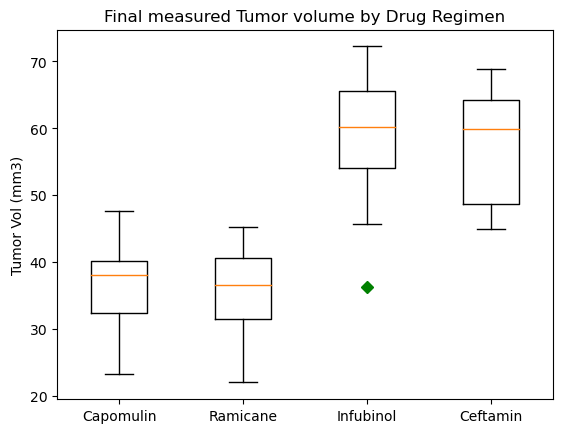

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]
fig1, ax = plt.subplots()
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

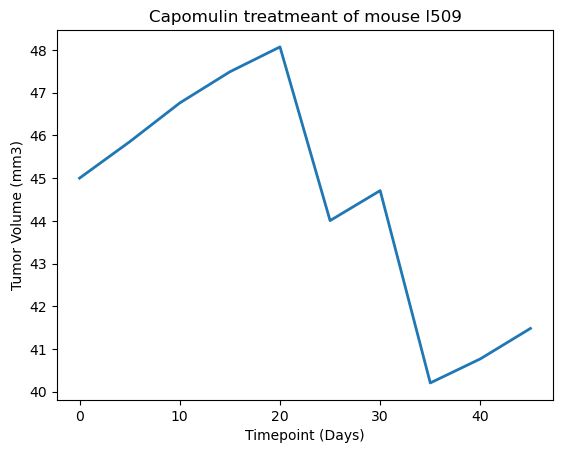

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# created a dataframe with specific mouse using the .loc() function and a boolean to find l509 data
#mouse was random
mouseline = cleanmouse.loc[cleanmouse["Mouse ID"] == "l509",:]
mouseline
# defined the x axis list by calling the timepoints from the l509 dataframe
x_axisTP = mouseline["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumorsize = mouseline["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') 
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axisTP, tumorsize,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

C:\Users\HeatB\AppData\Local\Temp\ipykernel_37744\369468021.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratmean = ratscat.groupby(['Mouse ID']).mean()


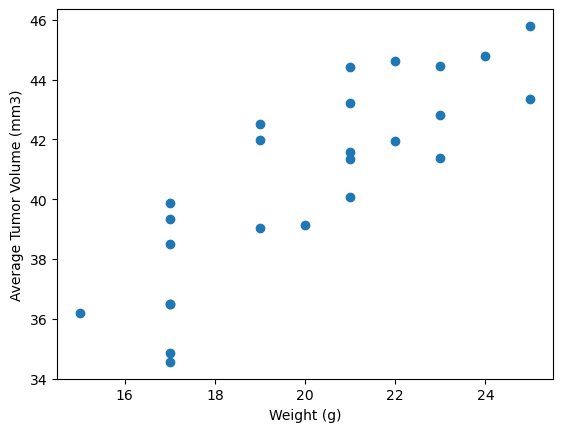

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
ratscat = cleanmouse.loc[cleanmouse["Drug Regimen"] == "Capomulin",:]
# use groupby() and mean() to create a dataframe
ratmean = ratscat.groupby(['Mouse ID']).mean()
# created scatter plot of the x axis (weight) and the y axis (tumor size) by calling from the capavg dataframe
plt.scatter(ratmean['Weight (g)'],ratmean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()
ratmean

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
ratcorre = round(st.pearsonr(ratmean['Weight (g)'],ratmean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {ratcorre}")

The correlation between mouse weight and average tumor volume is 0.84


In [24]:
model = st.linregress(ratmean['Weight (g)'],ratmean['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


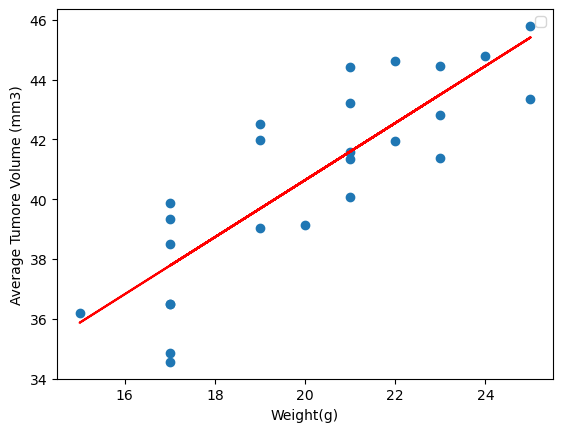

In [25]:
slope=0.9544396890241049
intercept=21.552160532685008

line = slope*(ratmean['Weight (g)'])+intercept
plt.scatter(ratmean['Weight (g)'],ratmean['Tumor Volume (mm3)'])
plt.plot(ratmean['Weight (g)'], line, 'r')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.legend()
plt.savefig('linearregression')
plt.show()